In [5]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import yfinance as yf
import argparse
style.use('ggplot')

In [8]:
stocks = ['AAPL', 'MSFT']

In [9]:
start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()


df = yf.download(stocks,
                 start=start,
                 end=end,
                 progress=True)

df.to_csv(f"Stocks_{'-'.join(stocks)}_{dt.date.today()}.csv")

[*********************100%***********************]  2 of 2 completed


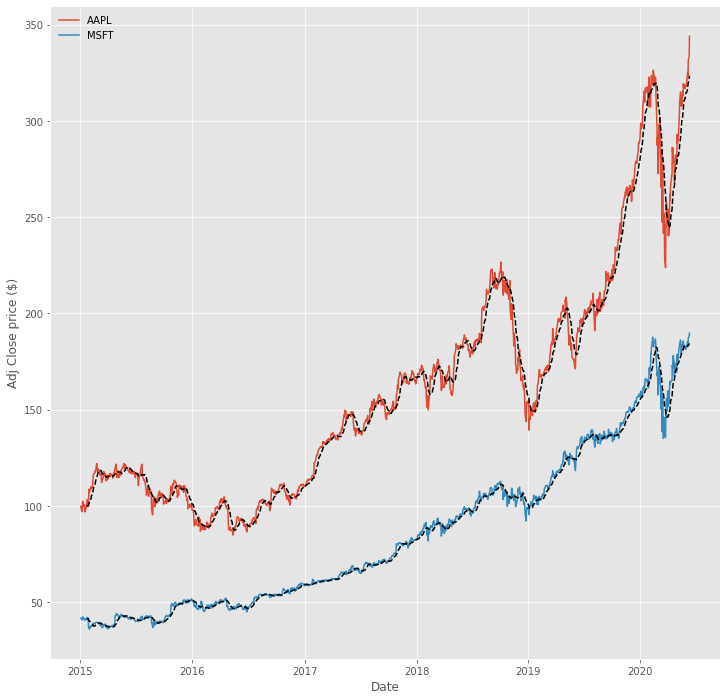

In [22]:
plot = True
plt.figure(figsize=(12,12))
if plot:
    if len(stocks) == 1:
        plt.plot(df.index, df['Adj Close'], label=stocks[0])
        plt.legend(frameon=False)
        plt.xlabel('Date')
        plt.ylabel('Adj Close price ($)')
        plt.show()

    else:
        for stock in stocks:
            plt.plot(df.index, df['Adj Close'][stock], label=stock)
            plt.plot(df.index, df['Adj Close'][stock].rolling(window=14).mean(), '--k')

        plt.legend(frameon=False)
        plt.xlabel('Date')
        plt.ylabel('Adj Close price ($)')
        plt.show()

In [19]:
df['Adj Close']['AAPL'].rolling(window=14).mean()

Date
2015-01-02           NaN
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
2015-01-08           NaN
                 ...    
2020-06-03    317.261431
2020-06-04    318.174288
2020-06-05    319.873574
2020-06-08    321.195003
2020-06-09    323.398573
Name: AAPL, Length: 1368, dtype: float64